In [1]:
import tensorflow as tf

2024-04-08 11:35:46.044833: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 参考
https://blog.csdn.net/qq_30992103/article/details/101481071

https://zhuanlan.zhihu.com/p/645269943

# 1 tf.keras.activations.elu
    tf.keras.activations.elu(
        x, alpha=1.0
    )

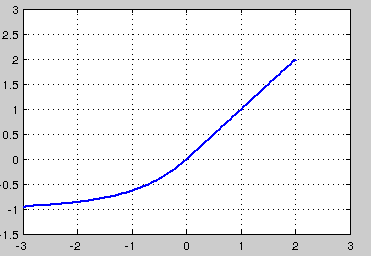

The exponential linear unit (ELU) with alpha > 0 is define as:

x if x > 0

alpha *(exp(x) - 1) if x < 0

In [3]:
x = tf.constant([[1,2],[-1,-2]]);
dense = tf.keras.layers.Dense(units=2);
y = dense(x)
tf.print(y)
z = tf.keras.activations.elu(y,alpha=2)
tf.print(z)

[[-2.7109127 -0.455023527]
 [2.7109127 0.455023527]]
[[-1.86704779 -0.731133938]
 [2.7109127 0.455023527]]


In [4]:
2*(tf.exp(-2.7109127)-1)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.8670478>

### tf.keras.activations.exponential(x)

In [2]:
x = tf.constant([1,-1,2])
y = tf.keras.activations.exponential(x)
tf.print(y)

[2.71828175 0.36787945 7.38905621]


In [5]:
tf.print(tf.exp(-1.0))

0.36787945


### tf.keras.activations.gelu
tf.keras.activations.gelu(
    x, approximate=False
)

The Gaussian error linear unit (GELU) is defined as:

gelu(x) = x * P(X <= x) where P(X) ~ N(0, 1), i.e. gelu(x) = 0.5 * x * (1 + erf(x / sqrt(2))).

GELU weights inputs by their value, rather than gating inputs by their sign as in ReLU.

* 正态分布的累积分布函数：

标准差为σ 且均值为μ 的高斯分布的累积分布函数（CDF）为：

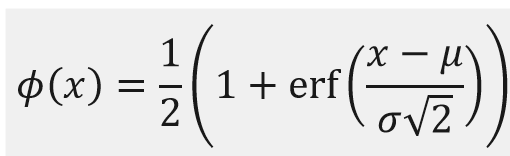

In [7]:
x = tf.constant([0.01,1.0,2.0, -3.0])
y = tf.keras.activations.gelu(x,approximate=False)
tf.print(y)

[0.00503989309 0.841344714 1.95449972 -0.00404968858]


### tf.keras.activations.get 

In [11]:
get=tf.keras.activations.get("softmax")
x = tf.constant([-1.0,2.0,4.0])
y = get(x)
tf.print(y)

[0.00589975 0.118499652 0.875600576]


### tf.keras.activations.hard_sigmoid

tf.keras.activations.hard_sigmoid(
    x
)

The hard sigmoid activation is defined as:

    - `0` if `if x < -2.5`
    - `1` if `x > 2.5`
    - `0.2 * x + 0.5` if `-2.5 <= x <= 2.5`

    It's a faster, piecewise linear approximation of the sigmoid activation.

In [14]:
x = tf.constant([-3,-2,-1,0,1,2,3], dtype=tf.float32)
y = tf.keras.activations.hard_sigmoid(x)
y

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.        , 0.16666667, 0.33333334, 0.5       , 0.6666667 ,
       0.8333333 , 1.        ], dtype=float32)>

### tf.keras.activations.leaky_relu
tf.keras.activations.leaky_relu(
    x, negative_slope=0.2
)

### 

In [16]:
x = tf.constant([-4,-3,-2,-1,0,1,2,3,4,5], dtype=tf.float32)
y = tf.keras.activations.leaky_relu(x, negative_slope=0.1)
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.4, -0.3, -0.2, -0.1,  0. ,  1. ,  2. ,  3. ,  4. ,  5. ],
      dtype=float32)>

### tf.keras.activations.linear

tf.keras.activations.linear(
    x
)

A "linear" activation is an identity function: it returns the input, unmodified.

### tf.keras.activations.log_softmax
log_softmax(x, axis=-1):

    """Log-Softmax activation function.

    Each input vector is handled independently.
    The `axis` argument sets which axis of the input the function
    is applied along.

    Args:
        x: Input tensor.
        axis: Integer, axis along which the softmax is applied.
    """

In [18]:
x=tf.constant([-1,0,1,2], dtype=tf.float32)
y1=tf.keras.activations.softmax(x, axis=-1)
y2=tf.keras.activations.log_softmax(x, axis=-1)
tf.print(y1,y2)

[0.0320586041 0.0871443227 0.236882836 0.643914282] [-3.4401896 -2.4401896 -1.44018972 -0.440189689]


In [20]:
x1=tf.constant([0.0320586041,0.0871443227,0.236882836,0.643914282])
tf.math.log(x1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-3.4401896 , -2.4401896 , -1.4401896 , -0.44018966], dtype=float32)>

# tf.keras.activations.mish
tf.keras.activations.mish(
    x
)

It is defined as:
mish(x) = x * tanh(softplus(x))

where softplus is defined as:

softplus(x) = log(exp(x) + 1)

In [23]:
x = tf.constant([[-1,0,1],[-2,-1,1]], dtype=tf.float32)
y = tf.keras.activations.mish(x)
y1 = tf.keras.activations.softplus(x)
y2 = x * tf.math.tanh(y1)
tf.print(y)
tf.print(y2)

[[-0.30340144 0 0.865098357]
 [-0.252501488 -0.30340144 0.865098357]]
[[-0.30340144 0 0.865098357]
 [-0.252501488 -0.30340144 0.865098357]]


# tf.keras.activations.relu

tf.keras.activations.relu(
    x, negative_slope=0.0, max_value=None, threshold=0.0
)

With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

Modifying default parameters allows you to use non-zero thresholds, change the max value of the activation, and to use a non-zero multiple of the input for values below the threshold.

Args
* x	Input tensor.
* negative_slope	A float that controls the slope for values lower than the threshold.
* max_value	A float that sets the saturation threshold (the largest value the function will return).
* threshold	A float giving the threshold value of the activation function below which values will be damped or set to zero.

In [25]:
x = [-10, -5, 0.0, 5, 10]
tf.keras.activations.relu(x)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 0.,  0.,  0.,  5., 10.], dtype=float32)>

In [26]:
tf.keras.activations.relu(x,negative_slope=0.5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-5. , -2.5,  0. ,  5. , 10. ], dtype=float32)>

In [27]:
tf.keras.activations.relu(x, max_value=5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 5., 5.], dtype=float32)>

In [29]:
# threshold	A float giving the threshold value of the activation function below which values will be damped or set to zero.
tf.keras.activations.relu(x, threshold=5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-0., -0.,  0.,  0., 10.], dtype=float32)>

# tf.keras.activations.selu
    """Scaled Exponential Linear Unit (SELU).

    The Scaled Exponential Linear Unit (SELU) activation function is defined as:

    - `scale * x` if `x > 0`
    - `scale * alpha * (exp(x) - 1)` if `x < 0`

    where `alpha` and `scale` are pre-defined constants
    (`alpha=1.67326324` and `scale=1.05070098`).

    Basically, the SELU activation function multiplies `scale` (> 1) with the
    output of the `keras.activations.elu` function to ensure a slope larger
    than one for positive inputs.

    The values of `alpha` and `scale` are
    chosen so that the mean and variance of the inputs are preserved
    between two consecutive layers as long as the weights are initialized
    correctly (see `keras.initializers.LecunNormal` initializer)
    and the number of input units is "large enough"
    (see reference paper for more information).

    Args:
        x: Input tensor.

    Notes:

    - To be used together with the
        `keras.initializers.LecunNormal` initializer.
    - To be used together with the dropout variant
        `keras.layers.AlphaDropout` (rather than regular dropout).

    Reference:

    - [Klambauer et al., 2017](https://arxiv.org/abs/1706.02515)
    """

In [3]:
x = [-3,-1,0,1,2,3]
x = tf.constant(x, dtype=tf.float32)
tf.keras.activations.selu(x)

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([-1.6705687, -1.1113307,  0.       ,  1.050701 ,  2.101402 ,
        3.152103 ], dtype=float32)>

In [4]:
# `alpha=1.67326324` and `scale=1.05070098`
1.05070098*tf.keras.activations.elu(x,alpha=1.67326324)

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([-1.6705688, -1.1113307,  0.       ,  1.050701 ,  2.101402 ,
        3.152103 ], dtype=float32)>

# tf.keras.activations.sigmoid

In [5]:
x = tf.constant([-3,-2,-1,0,1,2,3], dtype=tf.float32)
tf.keras.activations.sigmoid(x)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.04742587, 0.11920292, 0.26894143, 0.5       , 0.7310586 ,
       0.8807971 , 0.95257413], dtype=float32)>

In [6]:
1/(tf.math.exp(-1*x)+1)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.04742587, 0.11920292, 0.26894143, 0.5       , 0.7310586 ,
       0.880797  , 0.95257413], dtype=float32)>

# tf.keras.activations.silu
    """Swish (or Silu) activation function.

    It is defined as: `swish(x) = x * sigmoid(x)`.

    The Swish (or Silu) activation function is a smooth,
    non-monotonic function that is unbounded above and
    bounded below.

    Args:
        x: Input tensor.

    Reference:

    - [Ramachandran et al., 2017](https://arxiv.org/abs/1710.05941)
    """

In [7]:
x = tf.constant([-3,-2,-1,0,1,2,3], dtype=tf.float32)
tf.keras.activations.silu(x)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.14227763, -0.23840584, -0.26894143,  0.        ,  0.7310586 ,
        1.7615942 ,  2.8577223 ], dtype=float32)>

In [8]:
x * tf.keras.activations.sigmoid(x)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.14227763, -0.23840584, -0.26894143,  0.        ,  0.7310586 ,
        1.7615942 ,  2.8577223 ], dtype=float32)>

# tf.keras.activations.softmax

tf.keras.activations.softmax(
    x, axis=-1
)

In [9]:
x = tf.constant([-3,-2,-1,0,1,2,3], dtype=tf.float32)
tf.keras.activations.softmax(x)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.0015683 , 0.00426308, 0.01158826, 0.03150015, 0.0856263 ,
       0.23275642, 0.6326975 ], dtype=float32)>

# tf.keras.activations.softplus

tf.keras.activations.softplus(x)

It is defined as: softplus(x) = log(exp(x) + 1).

In [10]:
x = tf.constant([-3,-2,-1,0,1,2,3], dtype=tf.float32)
tf.keras.activations.softplus(x)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.04858735, 0.12692802, 0.3132617 , 0.6931472 , 1.3132616 ,
       2.126928  , 3.0485873 ], dtype=float32)>

In [11]:
tf.math.log(tf.math.exp(x)+1)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.04858733, 0.12692805, 0.31326166, 0.6931472 , 1.3132616 ,
       2.126928  , 3.0485873 ], dtype=float32)>

# tf.keras.activations.softsign

tf.keras.activations.softsign(x)

Softsign is defined as: softsign(x) = x / (abs(x) + 1).

In [12]:
x = tf.constant([-3,-2,-1,0,1,2,3], dtype=tf.float32)
tf.keras.activations.softsign(x)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.75     , -0.6666667, -0.5      ,  0.       ,  0.5      ,
        0.6666667,  0.75     ], dtype=float32)>

In [13]:
x/(tf.math.abs(x)+1)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.75     , -0.6666667, -0.5      ,  0.       ,  0.5      ,
        0.6666667,  0.75     ], dtype=float32)>

# tf.keras.activations.tanh
tf.keras.activations.tanh(x)

It is defined as:

tanh(x) = sinh(x) / cosh(x), i.e. tanh(x) = ((exp(x) - exp(-x)) / (exp(x) + exp(-x))).


In [14]:
x = tf.constant([-3,-2,-1,0,1,2,3], dtype=tf.float32)
tf.keras.activations.tanh(x)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.9950547, -0.9640276, -0.7615942,  0.       ,  0.7615942,
        0.9640276,  0.9950547], dtype=float32)>

In [15]:
(tf.math.exp(x)-tf.math.exp(-1*x))/(tf.math.exp(x)+tf.math.exp(-1*x))

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.9950547, -0.9640275, -0.7615942,  0.       ,  0.7615942,
        0.9640275,  0.9950547], dtype=float32)>